In [1]:
%matplotlib inline

# CLASSIFICATION

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib

## K nearest neighbours

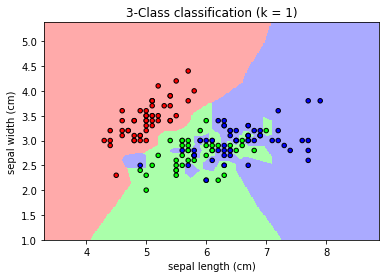

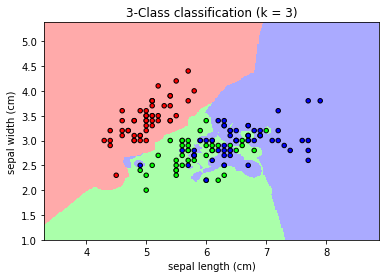

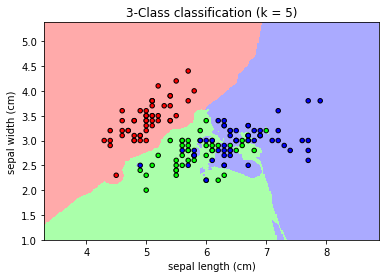

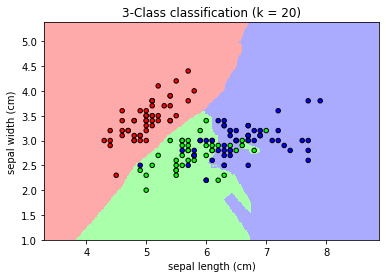

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
cols = iris['feature_names'][:2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1,3,5,20]:
    # we create an instance of kNN classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (n_neighbors))

    plt.show()
    
    # Cada 0.02, dibujas puntos en horizontal y en vertical.
    #           ...............
    #           ...............
    #           ...............
    #           ...............
    #           ...............
    #           ...............
    # Haces prediciones con cada punto y dibujas el punto con el color de la clase. 
    # Así parece que el fondo está pintado.
    # A simple vista, parece que la mejor es la 5 (k = 5)

#### EXERCISE 1
- Repeat the procedure, using one sepal and one petal variable.
- The step size employed was $h = 0.02$. How many points were used in the given example? And in the one you have done?
- Now repeat the process using PCA data compression with 2 PCs. Would you adjust $h$? would you use the same step size for both PCs? If necessary, make the adjustments you consider more adequate.


In [ ]:
 # Your solution here

#### Answers to the questions:

Your answers here

## Decision trees

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print("The first 5 instances\n",iris.data[:5])
print("The first 5 class variables\n",iris.target[:5])
print("The values of the feature variables\n",iris.feature_names)

The first 5 instances
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The first 5 class variables
 [0 0 0 0 0]
The values of the feature variables
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


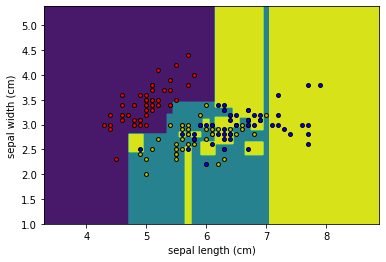

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"

# Adjustable parameters
plot_step = 0.02
pair = [0,1]

# We only take the two corresponding features
iris = load_iris()
X = iris.data[:, pair]
y = iris.target

# Train
clf = DecisionTreeClassifier(max_depth=10000).fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=15)
plt.show()

#### EXERCISE 2
- Looking at the provided plot, would you say that the model overfits? If so, why do you think it happens?

(Hint: See the info here https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- If you think that a better decision tree model could be created, do it in the same way as before. Compare both plots and justify why this new model is better.

In [ ]:
 # Your solution here

#### Comments:

Your comments here

## Random Forests

### Feature importances

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X_train = iris["data"]
y_train = iris["target"]
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=None, random_state=0)
rnd_clf.fit(X_train, y_train)

In [ ]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

In [ ]:
rnd_clf.feature_importances_

#### Question 1:
Is the random seed relevant for the order in the ranking of features acording to feature_importances? And for the cuantification of the relative importances between the features?

#### Answer:
Your answer here

In [ ]:
# Auxiliar function for plotting decision boundaries
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.0, 1.0, -1.0, 1.0], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
plt.figure(figsize=(6, 4))
for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, alpha=0.02, contour=False)

plt.show()

#### Question 2:
- How do you interpret the fact that nothing is visible? Which type of problem happened? Correct it.
- Once corrected, how do you interpret the fuzziness you are seeing?

#### Answer:
Your answer here

Here you have a scoring function where you can specify the classifier and score you wnat to employ

In [ ]:
# Auxiliar scoring function
def automatic_scoring(df, clf=DecisionTreeClassifier(), score='f1_macro'):
    from sklearn.model_selection import cross_val_score
    if clf == DecisionTreeClassifier:
        from sklearn.tree import DecisionTreeClassifier
    scorer = cross_val_score(estimator=clf, X=df.values[:, :-1], y=df.values[:, -1], cv=5, scoring=score)
    summary_score = scorer.mean()
    return summary_score


## Logistic regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e-10)
clf.fit(X, y)

# and plot the result
plt.figure(figsize=(17, 5))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model','0.5 line','ssamples'), loc="lower right", fontsize='small')
plt.show()

## Naive Bayes

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

## Support vector Machines

### Iris dataset

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(['linear','rbf','poly']):
    clf = svm.SVC(kernel=kernel, gamma=10, degree=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

#### Exercise 3:
- Play with the rbf kernel parameters and check how the shapes of the classification change when using the same classes as the example and the second and forth variables.
- Do the same for another pair of classes.
- Comment the differences you see in both cases.

In [ ]:
#Your solution here (include commented answer to the third point)

### Digits dataset

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

#### Exercise 4:
- Try all One-vs-All strategies, and calculate an estimation of the F1 score. Use f1_macro.
- Try all One-vs-One strategies, and calculate an estimation of the AUC score. Use roc_auc_score.

In [ ]:
# Your solution here

## Neural Networks

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100,), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()